Importa as bibliotecas necessárias

In [72]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#from sklearn.metrics import  confusion_matrix  

# Modulos Básicos
import itertools
import numpy as np
import matplotlib.pyplot as plt
# Divisão do datasets
from sklearn.model_selection import train_test_split
# Arvores de decisao
from sklearn import tree
import graphviz
# Matriz de Confusao
from sklearn.externals.six import StringIO  
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus



arquivo = pandas.read_csv('datasets/numericos.csv', sep=',')
dados = pandas.DataFrame(arquivo)

condicao=[(dados['NT_GER']>=0)&(dados['NT_GER']<=20),
         (dados['NT_GER']>20)&(dados['NT_GER']<=40),
         (dados['NT_GER']>40)&(dados['NT_GER']<=60),
         (dados['NT_GER']>60)&(dados['NT_GER']<=80),
         (dados['NT_GER']>80)&(dados['NT_GER']<=100)]
escolha=[1,2,3,4,5]
dados['NT_GER']=np.select(condicao,escolha)
#dados.NT_GER= np.select()
#dados['NT_GER']



In [73]:
'''
for k in range(1,3):
    c1=randint(2,51)
    c2=randint(2,51)
    x1 = dados.iloc[:,[1,c1,c2]]
    a=0
        
    x1_treino = x1.iloc[0:398582,1:]
    x1_teste = x1.iloc[398583:442867,1:]

    y1_treino=dados[1,0:398582]
    y1_teste=dados[1,398583:442867]


    #clf = MLPClassifier(alpha=0.01,max_iter=2000)
    clf = GaussianNB()
    clf.fit(x1_treino, y1_treino) 

    y1_previsto = clf.predict(x1_treino)

    with open('/content/drive/My Drive/Colab Notebooks/topicosic/trabalhoFinal/output.txt', 'a') as f:    
        print >> f,'---------------------------------Teste '+str(k)+'--------------------------'
        print >>f,'Variaveis '+str(c1)+' '+str(c2)
        print >>f,'Matriz de confusão '
        print >>f,confusion_matrix(y1_treino,y1_previsto)
        print >>f,'resulatdo classificação '
        print >>f,classification_report(y1_treino,y1_previsto)
        print >>f,'\n-----------------------------------------------------------------------\n'
'''

"\nfor k in range(1,3):\n    c1=randint(2,51)\n    c2=randint(2,51)\n    x1 = dados.iloc[:,[1,c1,c2]]\n    a=0\n        \n    x1_treino = x1.iloc[0:398582,1:]\n    x1_teste = x1.iloc[398583:442867,1:]\n\n    y1_treino=dados[1,0:398582]\n    y1_teste=dados[1,398583:442867]\n\n\n    #clf = MLPClassifier(alpha=0.01,max_iter=2000)\n    clf = GaussianNB()\n    clf.fit(x1_treino, y1_treino) \n\n    y1_previsto = clf.predict(x1_treino)\n\n    with open('/content/drive/My Drive/Colab Notebooks/topicosic/trabalhoFinal/output.txt', 'a') as f:    \n        print >> f,'---------------------------------Teste '+str(k)+'--------------------------'\n        print >>f,'Variaveis '+str(c1)+' '+str(c2)\n        print >>f,'Matriz de confusão '\n        print >>f,confusion_matrix(y1_treino,y1_previsto)\n        print >>f,'resulatdo classificação '\n        print >>f,classification_report(y1_treino,y1_previsto)\n        print >>f,'\n-----------------------------------------------------------------------\n'\

In [74]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de Confusão',cmap=plt.cm.Blues):
    """
    Essa função imprime a matriz de confusão
    A matriz pode ser nomarlizada atraves de `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
                 
    plt.tight_layout()
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Obtida')

def MatrizConfusao(y_test, y_pred,class_names):
    # Matriz de confusao
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,title='Matriz de confusão não normalizada')
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Matriz de confusão normalizada')
    plt.show()

Score: 0.403803


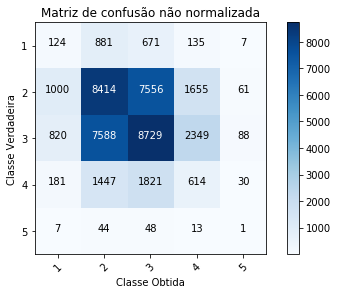

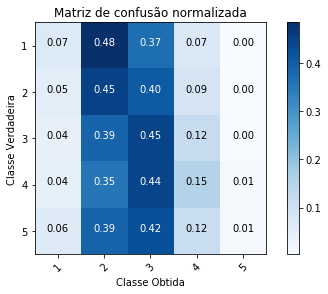

Matriz Confusao Concluida


ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'Source.gv'], make sure the Graphviz executables are on your systems' PATH

In [75]:
from sklearn import tree
import graphviz


def DecisionTree(dados):
    X_train = dados.iloc[0:398582,2:]
    X_test = dados.iloc[398583:442867,2:]

    y_train=dados.iloc[0:398582,1]
    y_test=dados.iloc[398583:442867,1]
    
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return clf, y_test,y_pred,clf.score(X_test,y_test)
  
def plot_tree(clf,iris):
    """
    Essa função imprime a Árvore de decisão.
    """
    dot_data = StringIO()
    #dot_data = tree.export_graphviz(clf, out_file=None)  
    #graph.render("iris") 

    dot_data=tree.export_graphviz(clf, out_file=None, feature_names=dados.columns[2:],class_names=['1','2','3','4','5'], filled=True, rounded=True, special_characters=True)  
    #graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph = graphviz.Source(dot_data)
    graph 
    #Image(graph.create_png())
    
    #graph = graphviz.Source(dot_data)  
    return graph 
 
  

def main():
    arquivo = pandas.read_csv('datasets/numericos.csv', sep=',')
    dados = pandas.DataFrame(arquivo)
   
    condicao=[(dados['NT_GER']>=0)&(dados['NT_GER']<=20),
         (dados['NT_GER']>20)&(dados['NT_GER']<=40),
         (dados['NT_GER']>40)&(dados['NT_GER']<=60),
         (dados['NT_GER']>60)&(dados['NT_GER']<=80),
         (dados['NT_GER']>80)&(dados['NT_GER']<=100)]
    escolha=[1,2,3,4,5]
    dados['NT_GER']=np.select(condicao,escolha)
   
    
    class_names = ['1','2','3','4','5']
    clf,y_test,y_pred,score = DecisionTree(dados)
    print('Score: %f' %score)
    
    #confusion_matrix(y_test,y_pred)
    
    MatrizConfusao(y_test, y_pred, class_names)
    print("Matriz Confusao Concluida")
    
    g = plot_tree(clf,dados)
    g.view()


main()

In [ ]:
dados.columns[2:]
